In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
%matplotlib inline

5. Using the pandas read_csv() function, read the GDP dataset into your notebook as a DataFrame called gdp_df.  
Take a look at the first 10 rows.  
Look at the last 5 rows. Do you see a problem? (_the file footer is in the last two cells_)  
Redo the read_csv() call to correct this issue - do not modify the original csv file.

In [27]:
# read in csv, remove last two rows, show first 10 rows
gdp_df = pd.read_csv('../data/gdp_per_capita.csv')[:-2]
gdp_df.head(10)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,NaN
5,Afghanistan,2013,1807.762344,NaN
6,Afghanistan,2012,1772.764974,NaN
7,Afghanistan,2011,1626.764793,NaN
8,Afghanistan,2010,1671.581238,NaN
9,Afghanistan,2009,1502.354073,NaN


In [28]:
# Other ways to drop the last two rows:
# gdp_df.drop(gdp_df.tail(2).index,inplace=True)
# df = pd.read_csv(filename, skipfooter=2, engine='python')

In [29]:
# check that the end of the file no longer has the footer
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
6724,Zimbabwe,1994,2768.309953,NaN
6725,Zimbabwe,1993,2572.870395,NaN
6726,Zimbabwe,1992,2591.007534,NaN
6727,Zimbabwe,1991,2906.272849,NaN
6728,Zimbabwe,1990,2819.549467,NaN


6. Drop the 'Value Footnotes' column, and rename the remaining columns to ‘Country’, ‘Year’, and ‘GDP_Per_Capita’.

In [30]:
# drop the Value Footnotes column
gdp_df = gdp_df.drop('Value Footnotes', axis = 1)

In [31]:
# rename the columns
gdp_df.columns = ["Country", "Year", "GDP_Per_Capita"]

7. How many rows and columns does gdp_df have? What are the data types of its columns? If any of the columns are not the expected types, figure out why and fix it.

In [32]:
# .info() will show the number of rows, columns, and data types.
# The 'Year' column should probably be an integer to make it easier to math.
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6729 entries, 0 to 6728
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         6729 non-null   object 
 1   Year            6729 non-null   object 
 2   GDP_Per_Capita  6729 non-null   float64
dtypes: float64(1), object(2)
memory usage: 157.8+ KB


In [33]:
# .shape will show the # of columns and rows
gdp_df.shape

(6729, 3)

In [34]:
# Apply .astype() to gdp_df.Year in order to change the data type of the values in the 'Year' field.
gdp_df.Year = gdp_df.Year.astype(int)

8. Which years are represented in this dataset? Take a look at the number of observations per year. What do you notice?  
_The number of observations increases slightly year-over-year between 1990 and 2011 (210 - 243), then starts declining between 2011 ands 2018 (243-226). The range of observations (210 to 243) is pretty small, though._

In [35]:
# Apply .unique() to get the distinct values within the gdp_df.Year field.
gdp_df.Year.unique()

array([2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008,
       2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997,
       1996, 1995, 1994, 1993, 1992, 1991, 1990])

In [36]:
# Apply .value_counts() and
# sort the values by the year using .sort_index()
# in order to get the number of observations per year.
gdp_df['Year'].value_counts().sort_index()

1990    210
1991    211
1992    213
1993    215
1994    218
1995    224
1996    224
1997    226
1998    227
1999    228
2000    236
2001    237
2002    238
2003    238
2004    238
2005    238
2006    238
2007    239
2008    240
2009    241
2010    241
2011    243
2012    241
2013    241
2014    240
2015    240
2016    239
2017    239
2018    226
Name: Year, dtype: int64

9. How many countries are represented in this dataset? Which countries are least represented in the dataset? Why do you think these countries have so few observations?

In [37]:
# Count the number of unique values in the Country column of gdp_df
gdp_df['Country'].nunique()

243

In [38]:
# Apply .value_counts() and
# sort the values by number of values using .sort_index()
# in order to get the number of observations per country.
gdp_df['Country'].value_counts(sort = True).tail(20)

Montenegro                   22
San Marino                   21
Libya                        20
Eritrea                      20
Cayman Islands               20
Palau                        19
Qatar                        19
Kosovo                       19
Liberia                      19
Timor-Leste                  19
Other small states           19
Small states                 19
CuraÃ§ao                     19
SÃ£o TomÃ© and Principe      18
Afghanistan                  17
Nauru                        12
Sint Maarten (Dutch part)     9
South Sudan                   8
Turks and Caicos Islands      8
Djibouti                      1
Name: Country, dtype: int64

In [39]:
# show values for the bottom 5 countries by number of observations
print(gdp_df[gdp_df.Country.isin(['Djibouti', 'Turks and Caicos Islands', 'South Sudan', 'Sint Maarten (Dutch part)', 'Nauru'])])

                        Country  Year  GDP_Per_Capita
1429                   Djibouti  2011     2744.268655
4282                      Nauru  2018    14644.618133
4283                      Nauru  2017    13669.813249
4284                      Nauru  2016    12950.528981
4285                      Nauru  2015    12270.297592
4286                      Nauru  2014    12561.446336
4287                      Nauru  2013    10078.391356
4288                      Nauru  2012     7905.088755
4289                      Nauru  2011     7339.304367
4290                      Nauru  2010     6605.615120
4291                      Nauru  2009     5855.950100
4292                      Nauru  2008     5415.410229
4293                      Nauru  2007     4048.802597
5341  Sint Maarten (Dutch part)  2017    28882.795669
5342  Sint Maarten (Dutch part)  2016    32017.766638
5343  Sint Maarten (Dutch part)  2015    32819.242481
5344  Sint Maarten (Dutch part)  2014    33640.795768
5345  Sint Maarten (Dutch pa

In [40]:
# subset the gdp_df dataframe to see just the 'Early-demographic dividend' results (not sure what those lines represent?)
# print(gdp_df[gdp_df.Country == 'Early-demographic dividend'])

10. Create a new dataframe by subsetting gdp_df to just the year 2014. Call this new datafram gdp_2014.

In [41]:
gdp_2014 = gdp_df[gdp_df.Year == 2014]
print(gdp_2014)

                  Country  Year  GDP_Per_Capita
4             Afghanistan  2014     1795.735834
21                Albania  2014    10700.993216
50                Algeria  2014    13557.769757
79                 Angola  2014     6813.052106
108   Antigua and Barbuda  2014    20440.540555
...                   ...   ...             ...
6592   West Bank and Gaza  2014     4445.307470
6617                World  2014    14514.392218
6646                Yemen  2014     3828.484887
6675               Zambia  2014     3684.685507
6704             Zimbabwe  2014     2506.490220

[240 rows x 3 columns]


11. Use .describe() to find the summary statistics for GDP per capita in 2014.

In [42]:
gdp_2014.GDP_Per_Capita.describe()

count       240.000000
mean      18034.303556
std       19320.930599
min         672.681648
25%        4301.187365
50%       11868.067810
75%       24388.408410
max      130439.106674
Name: GDP_Per_Capita, dtype: float64

12. Create a histogram of GDP Per Capita numers for 2014 (you may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution?  
_The unimodal distribution is clustered < 20,000 and has a right skew._

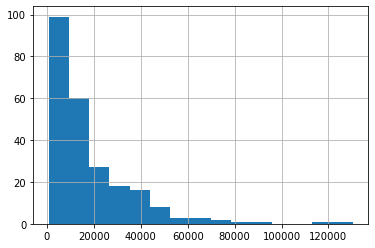

In [43]:
gdp_2014.GDP_Per_Capita.hist(bins = 15)

13. Find the top 5 counties and bottom 5 countries by GDP per capita in 2014.

In [49]:
# lowest GDP per capita 2014
print(gdp_2014.sort_values(by=['GDP_Per_Capita']).head(5))
# highest GDP per capita 2014
print(gdp_2014.sort_values(by=['GDP_Per_Capita']).tail(5))

                       Country  Year  GDP_Per_Capita
1014  Central African Republic  2014      672.681648
794                    Burundi  2014      768.469837
1375           Dem. Rep. Congo  2014      784.872656
4414                     Niger  2014      900.136918
3697                    Malawi  2014     1142.530804
               Country  Year  GDP_Per_Capita
707             Brunei  2014    76448.593329
5316         Singapore  2014    81965.361071
3610        Luxembourg  2014    92349.186429
5003             Qatar  2014   116693.507701
3639  Macao SAR, China  2014   130439.106674


14. Now, return to the full dataset, gdp_df. Pivot the data for 1990 and 2017 (using the pandas .pivot_table() method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2017. Save the result to a dataframe named gdp_pivoted.

In [56]:
# still need to remove countries with missing values for either 1990 or 2017
gdp_pivoted = pd.pivot_table(gdp_df, values = ['GDP_Per_Capita'], index = ['Country'], columns = ['Year'])
gdp_pivoted

GDP_Per_Capita                                            \
Year                          1990          1991          1992          1993   
Country                                                                        
Afghanistan                    NaN           NaN           NaN           NaN   
Albania                4458.247115   3229.250120   3015.391377   3323.864388   
Algeria               10300.015042   9929.097717   9873.024864   9453.323181   
Angola                 4761.229638   4651.204299   4238.318419   3118.903488   
Antigua and Barbuda   17454.549799  17598.378401  17497.380127  18055.500956   
...                            ...           ...           ...           ...   
West Bank and Gaza             NaN           NaN           NaN           NaN   
World                  8966.014072   8942.915645   8959.240204   8984.696890   
Yemen                  3425.707169   3466.039074   3561.740073   3519.550101   
Zambia                 2339.137959   2278.802025   2185.120656   2278.347123   
Zimbabwe               2819.549467   2906.272849   2591.007534   2572.870395   

                                                                             \
Year                         1994          1995          1996          1997   
Country                                                                       
Afghanistan                   NaN           NaN           NaN           NaN   
Albania               3622.007101   4129.975340   4533.894357   4064.132804   
Algeria               9176.235569   9344.748909   9558.822868   9509.123393   
Angola                3060.336207   3407.974524   3747.164004   3892.473420   
Antigua and Barbuda  18851.937822  17645.173769  18407.710553  19000.281878   
...                           ...           ...           ...           ...   
West Bank and Gaza    3236.196368   3314.761163   3208.119899   3517.569954   
World                 9109.764275   9271.364990   9489.446042   9725.189314   
Yemen                 3581.814359   3628.620445   3660.350262   3729.732721   
Zambia                2031.776457   2038.510332   2108.910953   2130.519957   
Zimbabwe              2768.309953   2736.486436   2985.856605   3036.422224   

                                                 ...                \
Year                         1998          1999  ...          2009   
Country                                          ...                 
Afghanistan                   NaN           NaN  ...   1502.354073   
Albania               4450.922523   5056.566515  ...   9525.377979   
Algeria               9845.209222  10017.374034  ...  12697.690780   
Angola                3945.594930   3902.774196  ...   6292.534856   
Antigua and Barbuda  19486.171892  19816.291441  ...  22568.626530   
...                           ...           ...  ...           ...   
West Bank and Gaza    3920.320010   4137.843864  ...   3816.165070   
World                 9831.530107  10041.606392  ...  12726.100963   
Yemen                 3839.688064   3873.781695  ...   4359.812628   
Zambia                2064.467651   2102.074889  ...   3115.937579   
Zimbabwe              3099.076182   3054.064189  ...   1632.999866   

                                                                             \
Year                         2010          2011          2012          2013   
Country                                                                       
Afghanistan           1671.581238   1626.764793   1772.764974   1807.762344   
Albania               9927.638204  10207.752347  10369.561032  10492.669028   
Algeria              12919.491054  13046.128511  13229.008711  13329.770758   
Angola                6360.441938   6346.395122   6645.085625   6730.945822   
Antigua and Barbuda  20555.414205  19876.215323  20283.897534  19918.131682   
...                           ...           ...           ...           ...   
West Bank and Gaza    4019.485067   4405.778573   4568.509070   4559.032259   
World                

15. Create a new column in gdp_pivoted named Percent_Change. This column should contain the percent change in GDP_Per_Capita from 1990 to 2017. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.

In [58]:
gdp_pivoted['Percent_Change'] = 100 * (gdp_pivoted['2017'] - gdp_pivoted['1990']) / gdp_pivoted['1990']
gdp_pivoted

KeyError: '2017'

16. How many countries experienced a negative percent change in GDP per capita from 1990 to 2017?

17. Which country had the highest % change in GDP per capita? Create a line plot showing this country's GDP per capita for all years from 1990 to 2017. Create another showing the country with the second highest % change in GDP. How do the trends in these countries compare? Bonus: Put both line charts on the same plot.

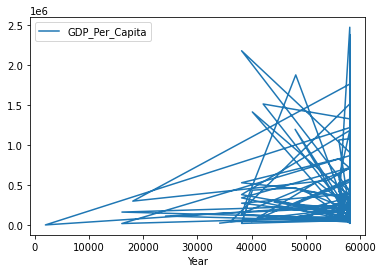

In [68]:
# need to fix this
gdp_df.groupby('Country').agg('sum').plot(kind = 'line', x = 'Year', y = 'GDP_Per_Capita')
plt.show()

18. Read in continents.csv contained in the data folder into a new dataframe called continents. We will be using this dataframe to add a new column to our dataset.

In [63]:
continents = pd.read_csv('../data/continents.csv')
continents.head()

,Continent,Country
0,Asia,Afghanistan
1,Europe,Albania
2,Africa,Algeria
3,Europe,Andorra
4,Africa,Angola


19. Merge gdp_df and continents. Keep only the countries that appear in both data frames. Save the result back to gdp_df.

In [69]:
gdp_df = gdp_df.merge(continents, on='Country')
gdp_df

,Country,Year,GDP_Per_Capita,Continent
0,Afghanistan,2018,1734.723214,Asia
1,Afghanistan,2017,1758.465636,Asia
2,Afghanistan,2016,1757.023490,Asia
3,Afghanistan,2015,1766.593077,Asia
4,Afghanistan,2014,1795.735834,Asia
...,...,...,...,...
5329,Zimbabwe,1994,2768.309953,Africa
5330,Zimbabwe,1993,2572.870395,Africa
5331,Zimbabwe,1992,2591.007534,Africa
5332,Zimbabwe,1991,2906.272849,Africa


20. Determine the number of countries per continent. Create a bar chart showing this.

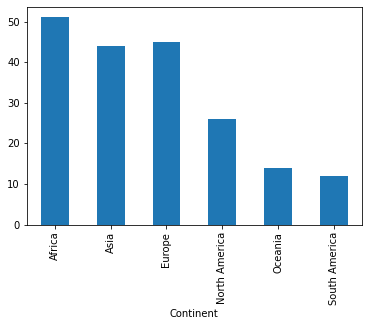

In [73]:
gdp_df.groupby('Continent')['Country'].nunique().plot(kind = 'bar')
plt.show()

21. Create a seaborn boxplot showing GDP per capita in 2014 split out by continent. What do you notice?

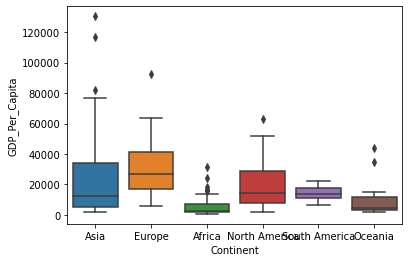

In [74]:
sns.boxplot(x = 'Continent', y = 'GDP_Per_Capita', data = gdp_df[gdp_df['Year'] == 2014])

22. Read in internet_use.csv into a DataFrame called internet_df. You will most likely get an error message when doing this - figure out what is going wrong and fix it. Take a look at the first and last five rows and make any corrections to your read_csv() call to fix this. Again, do not modify the original datasets.

In [86]:
internet_df = pd.read_csv('../data/internet_use.csv', usecols=['Country or Area', 'Year', 'Value'])[:-181]
internet_df.tail()

,Country or Area,Year,Value
4490,Zimbabwe,1997,0.033080326724463
4491,Zimbabwe,1996,0.016790483892511
4492,Zimbabwe,1995,0.00768353991953285
4493,Zimbabwe,1994,0.00173927955909959
4494,Zimbabwe,1990,0


23. Drop the Value Footnotes column and then rename the columns to ‘Country’, ‘Year’, and ‘Internet_Users_Pct’.

In [87]:
internet_df.columns = ['Country', 'Year', 'Value']

24. How many rows and columns does this new dataset have? What are the types of its columns? Ensure that the Internet_Users_Pct column is a numeric data type and fix it if it is not.

In [91]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  4495 non-null   object
 1   Year     4495 non-null   object
 2   Value    4495 non-null   object
dtypes: object(3)
memory usage: 105.5+ KB


25. What is the first year that has a nonzero internet users percentage reported? What is the general trend in internet users percentage over the years. Pick a visualization that you think illustrates this trend well.

26. Merge gdf_df and internet_df (on Country and Year) into a single DataFrame named gdp_and_internet_use. Keep only countries and years that appear in both tables.  
**Difficult Bonus**: Do not attempt this part until you have completed all other portions of the data question. Some countries have slightly different names in the internet use and gdp dataframes. For example, the Central African Republic is "Central African Republic" in the gdp dataframe and "Central African Rep." in the internet use dataframe. Find as many instances like this as you can and resolve them so that when merging you keep the maximum number of countries possible.  
FuzzyWuzzy: https://towardsdatascience.com/how-to-do-fuzzy-matching-in-python-pandas-dataframe-6ce3025834a6

27. Look at the first five rows of your new data frame to confirm it merged correctly. Also, check the last five rows to make sure the data is clean and as expected.

28. Create a new DataFrame, named gdp_and_internet_use_2014 by extracting data for the year 2014 from gdp_and_internet_use. What is the mean internet users percentage in 2014? How many countries have at least 90% internet users in 2014?

29. Find the countries that had the top 3 largest GDP per capita figures for 2014. Create a seaborn FacetGrid showing the change in internet user percentage over time for these five countries. Each individual figure in the facet grid will represent a single country. What trends do you notice?

30. Create a scatter plot of Internet Use vs GDP per Capita for the year 2014. What do you notice?

31. Find the correlation between GDP per Capita and Internet Use for the year 2014. What is the meaning of this number?

32. Add a column to gdp_and_internet_use_2014 and calculate the logarithm of GDP per capita. Find the correlation between the log of GDP per capita and internet users percentage. How does this compare to the calculation in the previous part?

33. Filter the original dataset down to just the United States for all available years. Calculate correlation between internet use and gdp per capita. Is this meaningful or useful?

Solo Exploration and Presentation:
1. Choose and download another data set from the UN data http://data.un.org/Explorer.aspx to merge with your data and explore. Prepare a short (< 5 minute) presentation of your findings. Report any interesting correlations you find. Include visualizations and consider adding interactivity with ipywidgets. This presentation can be done either in a Jupyter Notebook or using another presentation software, such as PowerPoint. (Check out Jupyter Slides if you have time. This allows you to turn your jupyter notebook into a slideshow.
2. If time allows, check out the plotly library to add additional interativity to your plots. https://plotly.com/python/plotly-express/).